In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv['data'].shape # Data is 64x64 images, but flattened as 4096

(400, 4096)

In [5]:
oliv['images'].shape

(400, 64, 64)

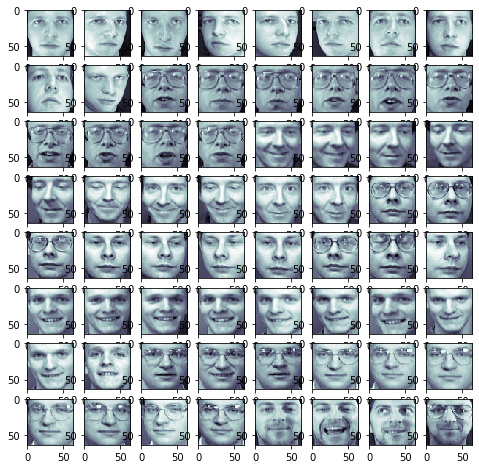

In [6]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [15]:
x = oliv.data
y = oliv.target

In [16]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_.shape

(400, 4096)

In [18]:
k = 0
current = 0
total = sum(pca.explained_variance_)
while current/total < 0.95:
    current += pca.explained_variance_[k]
    k += 1
k

123

In [19]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [24]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape 

(400, 4096)

In [27]:
x_approx_images = x_approx.reshape((-1, 64, 64))
x_approx_images.shape

(400, 64, 64)

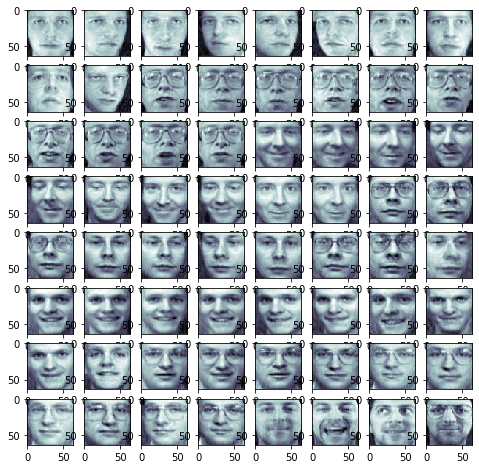

In [28]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [29]:
eigenv = pca.components_

In [34]:
eigenf = eigenv.reshape((-1, 64, 64))
eigenf.shape

(123, 64, 64)

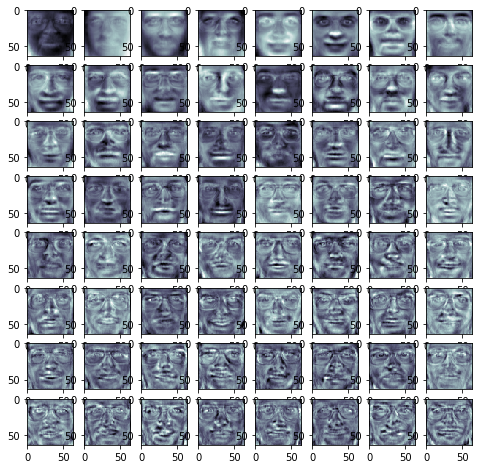

In [35]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenf[i], cmap = plt.cm.bone)
plt.show()